In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from sklearn.metrics import mean_squared_error
from keras.utils import plot_model
import matplotlib.dates as mdates
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.optimizers import Adam

In [ ]:
#company's stock market listed namee
company = 'META'
start_date = '2020-01-12'
end_date = '2023-12-11'

stock_data = yf.download(company, start=start_date, end=end_date)
#Close price of the stock of that particular trading day has been taken
data = stock_data[['Close']]

#preparing the data for training, converting th data of which the data understands
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

#this is for training data
previous_data = 60
# length of the training data which is 80% of total data
size_traindata = int(len(scaled_data) * 0.80)
#copies the data of the first train_size data in  scaled_data
train_data = scaled_data[:size_traindata]
test_data = scaled_data[size_traindata - previous_data:]

train_data = scaled_data[:int(len(scaled_data) * 0.8)]
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#creating the LSTM model
model1 = Sequential()
model1.reset_states()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model1.add(LSTM(units=100, return_sequences=True))
model1.add(LSTM(units=100, return_sequences=True))
model1.add(LSTM(units=100))
model1.add(Dense(units=1))

model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x_train, y_train, epochs=30, batch_size=32)

[*********************100%%**********************]  1 of 1 completed
Epoch 1/30
23/23 [==============================] - 12s 162ms/step - loss: 0.0381
Epoch 2/30
23/23 [==============================] - 4s 163ms/step - loss: 0.0066
Epoch 3/30
23/23 [==============================] - 5s 223ms/step - loss: 0.0048
Epoch 4/30
23/23 [==============================] - 4s 165ms/step - loss: 0.0047
Epoch 5/30
23/23 [==============================] - 4s 166ms/step - loss: 0.0045
Epoch 6/30
23/23 [==============================] - 5s 197ms/step - loss: 0.0035
Epoch 7/30
23/23 [==============================] - 4s 192ms/step - loss: 0.0033
Epoch 8/30
23/23 [==============================] - 4s 163ms/step - loss: 0.0035
Epoch 9/30
23/23 [==============================] - 4s 163ms/step - loss: 0.0029
Epoch 10/30
23/23 [==============================] - 5s 224ms/step - loss: 0.0028
Epoch 11/30
23/23 [==============================] - 4s 162ms/step - loss: 0.0032
Epoch 12/30
23/23 [==================

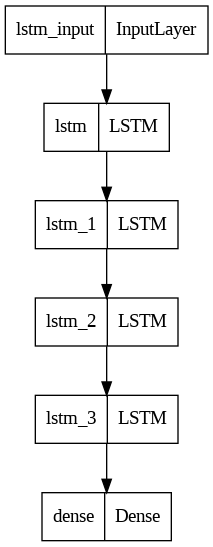

In [ ]:
plot_model(model1)

In [ ]:
#Making the predictions with our LSTM model with test data
test_data = scaled_data[int(len(scaled_data) * 0.8) - 60:]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(np.reshape(y_test, (-1, 1)))
dates = stock_data.index[-len(y_test):]

7/7 [==============================] - 2s 53ms/step


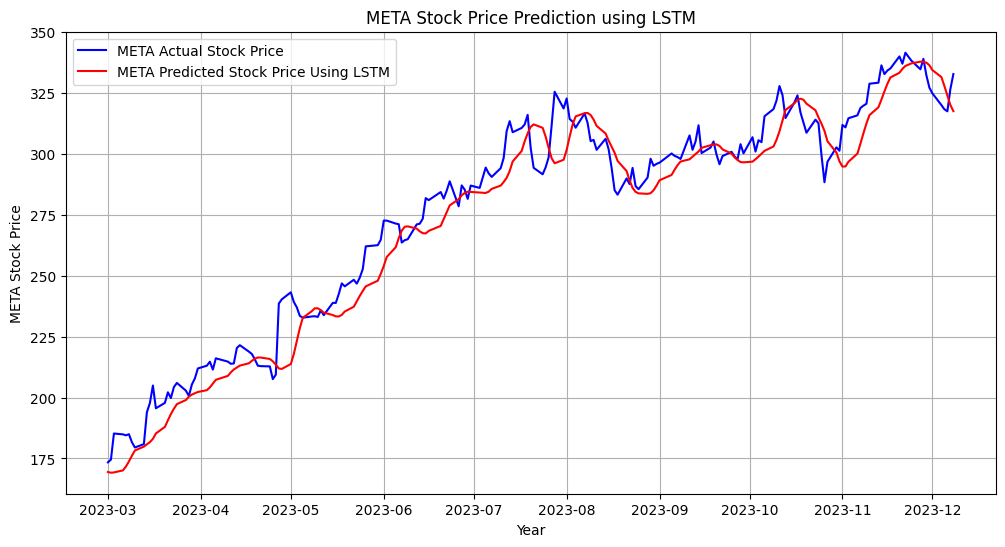

In [ ]:
#Plotting for comparision between the LSTM model predicted prices vs Actual prices
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label=f'{company} Actual Stock Price', color='blue')
plt.plot(dates, predictions, label=f'{company} Predicted Stock Price Using LSTM', color='red')
plt.title(f'{company} Stock Price Prediction using LSTM')
plt.xlabel('Year')
plt.ylabel(f'{company} Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
##creating the RNN model
train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=previous_data, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=previous_data, batch_size=1)

model2 = Sequential()
model2.reset_states()
model2.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model2.add(SimpleRNN(units=80, return_sequences=True))
model2.add(SimpleRNN(units=100))
model2.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mean_squared_error')
model2.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
23/23 [==============================] - 4s 42ms/step - loss: 0.0991
Epoch 2/30
23/23 [==============================] - 1s 42ms/step - loss: 0.0038
Epoch 3/30
23/23 [==============================] - 1s 43ms/step - loss: 0.0021
Epoch 4/30
23/23 [==============================] - 1s 42ms/step - loss: 0.0016
Epoch 5/30
23/23 [==============================] - 1s 43ms/step - loss: 0.0016
Epoch 6/30
23/23 [==============================] - 1s 43ms/step - loss: 0.0014
Epoch 7/30
23/23 [==============================] - 1s 42ms/step - loss: 0.0013
Epoch 8/30
23/23 [==============================] - 1s 61ms/step - loss: 0.0014
Epoch 9/30
23/23 [==============================] - 2s 78ms/step - loss: 0.0013
Epoch 10/30
23/23 [==============================] - 2s 66ms/step - loss: 0.0012
Epoch 11/30
23/23 [==============================] - 1s 43ms/step - loss: 0.0012
Epoch 12/30
23/23 [==============================] - 1s 42ms/step - loss: 0.0012
Epoch 13/30
23/23 [==================

In [ ]:
#Predicting the values using test_generator
predictions_model2 = model2.predict(test_generator)
predictions_model2 = scaler.inverse_transform(predictions_model2)
actual_prices = scaler.inverse_transform(test_data[previous_data:])

197/197 [==============================] - 2s 8ms/step


In [ ]:
#Calculatin the RMSE values for RNN model
mse = mean_squared_error(actual_prices, predictions_model2)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 6.097469108611476


In [ ]:
#Calculatin the Standard deviation values for RNN model

residuals = actual_prices - predictions_model2
std_deviation = np.std(residuals)
print(f"Standard Deviation: {std_deviation}")

Standard Deviation: 5.711142436650112


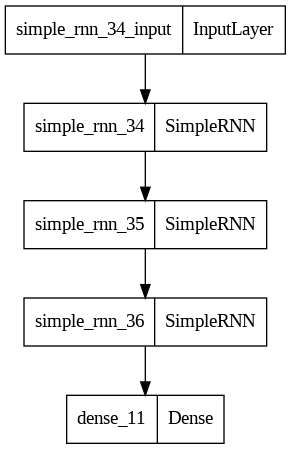

In [ ]:
plot_model(model2)

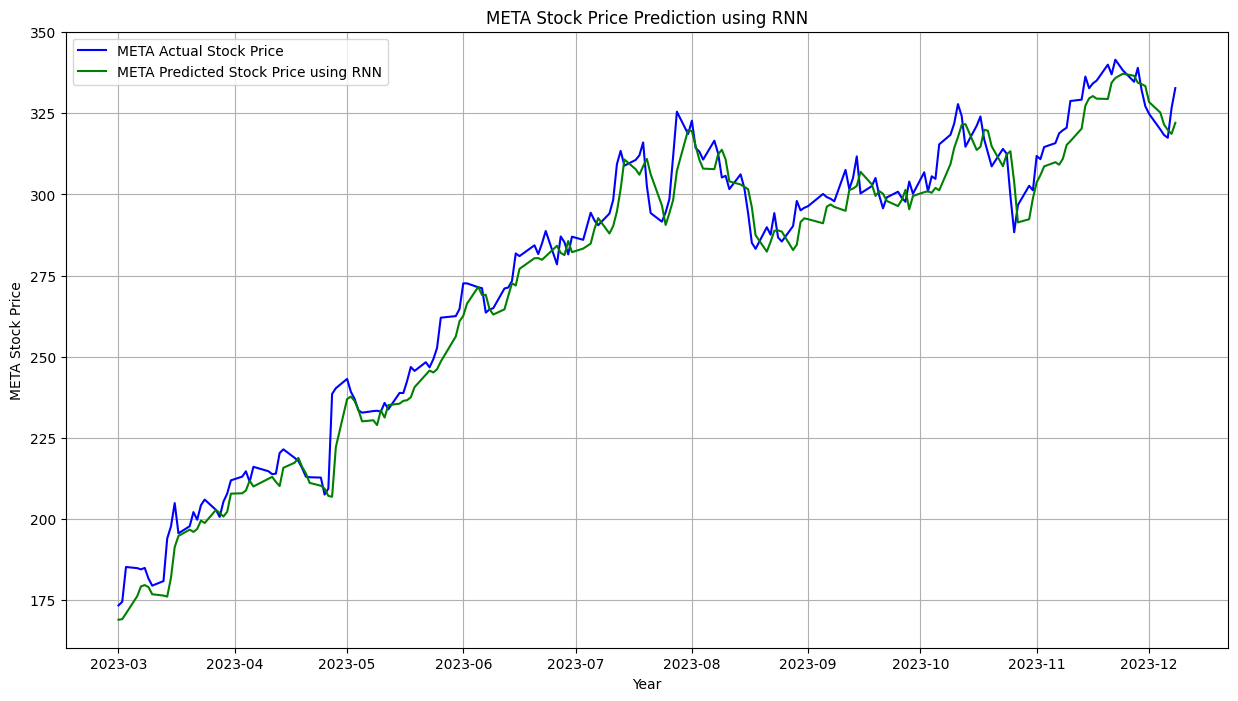

In [ ]:
#Plotting for comparision between the RNN model predicted prices vs Actual prices
plt.figure(figsize=(15,8))
plt.plot(dates,actual_prices, label=f'{company} Actual Stock Price', color='blue')
plt.plot(dates,predictions_model2, label=f'{company} Predicted Stock Price using RNN', color='green')
plt.title(f'{company} Stock Price Prediction using RNN')
plt.xlabel('Year')
plt.ylabel(f'{company} Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Function to predict the future values for models

def future_predict(model, scaleddata, days_to_predict, scaler, previous_data=3000):
    in_data = scaleddata[-previous_data:].reshape(1, previous_data, 1)

    predictions_future = []
    for _ in range(days_to_predict):
        check1 = model.predict(in_data)
        predictions_future.append(check1[0, 0])
        in_data = np.append(in_data[:, 1:, :], check1.reshape(1, 1, 1), axis=1)
    predictions_future = scaler.inverse_transform(np.array(predictions_future).reshape(-1, 1))
    return predictions_future

to_predict = 60
future_model1 = future_predict(model1, scaled_data, to_predict, scaler, previous_data)
future_model2 = future_predict(model2, scaled_data, to_predict, scaler, previous_data)

1/1 [==============================] - 0s 31ms/step


In [ ]:
# Plot the predictions
date1 = data.loc[data.index <= dates[0]]

predicted_dates = pd.date_range(start=data.index[-1], periods=to_predict + 1, closed='right')
plt.figure(figsize=(20,10))
plt.plot(dates, predictions, label=f'{company} Predicted Stock Price using LSTM', color='red')
plt.plot(dates, predictions_model2, label=f'{company} Predicted Stock Price using RNN', color='green')
plt.plot(date1.index, date1['Close'], color='blue', label=f'{company} Meta Actual Price')
plt.plot(predicted_dates, future_model1, color='red')
plt.plot(predicted_dates, future_model2, color='green')
plt.title(f' Stock Price Prediction for the Next {to_predict} Days')
plt.xlabel('Time')
plt.ylabel(f'{company} Stock Price')
plt.grid(True)
plt.legend()
plt.show()